Name :- Nishank Dave

NUID :- 002747726

ML Data Cleaning and Feature Selection

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pylab as plt
from matplotlib import pyplot

In [83]:
data = pd.read_csv("/content/drive/MyDrive/walmartSample.csv") #reading the data


#For this Machine Learning assignment, we will use the “Walmart Recruiting — Store Sales Forecasting” dataset, from Kaggle.

The goal is to predict the Weekly Sales for specific stores, departments and dates.
* Store — the store number
* Dept — the department number
* Date — the week
* Weekly_Sales — sales for the given department in the given store
* IsHoliday — whether the week is a special holiday week
* Temperature — average temperature in the region.
* Fuel_Price — cost of fuel in the region.
* MarkDown1–5 — anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
* CPI — the consumer price index.
* Unemployment — the unemployment rate.

#Data exploration
#Let’s have a look on the dataset, We can identify the following input variables:

* Store
* Dept
* Date
* IsHoliday
* Type
* Size
* Temperature
* Fuel_Price
* MarkDown1
* MarkDown2
* MarkDown3
* MarkDown4
* MarkDown5
* CPI
* Unemployment
* The Target variable is Weekly_Sales

In [84]:
data
#data.head(5)
#data.tail(5)

,Unnamed: 0,X,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,202017,202017,21,2011-02-25,False,36,1025.00,61.27,3.065,NaN,NaN,NaN,NaN,NaN,213.190421,8.028,B,140167
1,165520,165520,17,2012-03-02,False,31,1236.64,26.28,3.242,14469.08,1163.89,37.38,8771.30,2237.79,130.645793,6.403,B,93188
2,389207,389207,41,2011-12-02,False,94,37971.00,34.53,3.378,4594.56,305.47,1781.24,3168.10,21739.26,195.822329,6.759,A,196321
3,133193,133193,14,2011-05-06,False,67,26400.02,58.21,4.046,NaN,NaN,NaN,NaN,NaN,185.937438,8.521,A,200898
4,401356,401356,43,2010-10-08,False,1,8748.54,72.81,2.633,NaN,NaN,NaN,NaN,NaN,203.665179,10.210,C,41062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,172845,172845,18,2011-06-10,False,36,5338.50,69.49,3.924,NaN,NaN,NaN,NaN,NaN,134.942548,8.975,B,120653
496,154839,154839,16,2011-12-02,False,4,13876.12,27.83,3.378,516.47,61.00,944.52,9.00,7124.75,195.822329,6.232,B,57197
497,197058,197058,20,2012-06-29,False,48,1034.00,74.15,3.506,6569.40,605.70,NaN,561.31,4567.03,214.646676,7.139,A,203742
498,149126,149126,16,2010-04-02,False,18,3943.81,36.19,2.725,NaN,NaN,NaN,NaN,NaN,189.704822,6.842,B,57197


In [85]:
data.info()
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])
numeric_data.shape[1]
categorical_data.shape[1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    500 non-null    int64  
 1   X             500 non-null    int64  
 2   Store         500 non-null    int64  
 3   Date          500 non-null    object 
 4   IsHoliday     500 non-null    bool   
 5   Dept          500 non-null    int64  
 6   Weekly_Sales  500 non-null    float64
 7   Temperature   500 non-null    float64
 8   Fuel_Price    500 non-null    float64
 9   MarkDown1     170 non-null    float64
 10  MarkDown2     125 non-null    float64
 11  MarkDown3     155 non-null    float64
 12  MarkDown4     154 non-null    float64
 13  MarkDown5     172 non-null    float64
 14  CPI           500 non-null    float64
 15  Unemployment  500 non-null    float64
 16  Type          500 non-null    object 
 17  Size          500 non-null    int64  
dtypes: bool(1), float64(10), int64

3

# What are the data types? (Only numeric and categorical)

categorical - 2

numeric - 15

boolean - 1

In [86]:
data.isnull().sum()

Unnamed: 0        0
X                 0
Store             0
Date              0
IsHoliday         0
Dept              0
Weekly_Sales      0
Temperature       0
Fuel_Price        0
MarkDown1       330
MarkDown2       375
MarkDown3       345
MarkDown4       346
MarkDown5       328
CPI               0
Unemployment      0
Type              0
Size              0
dtype: int64

<Axes: >

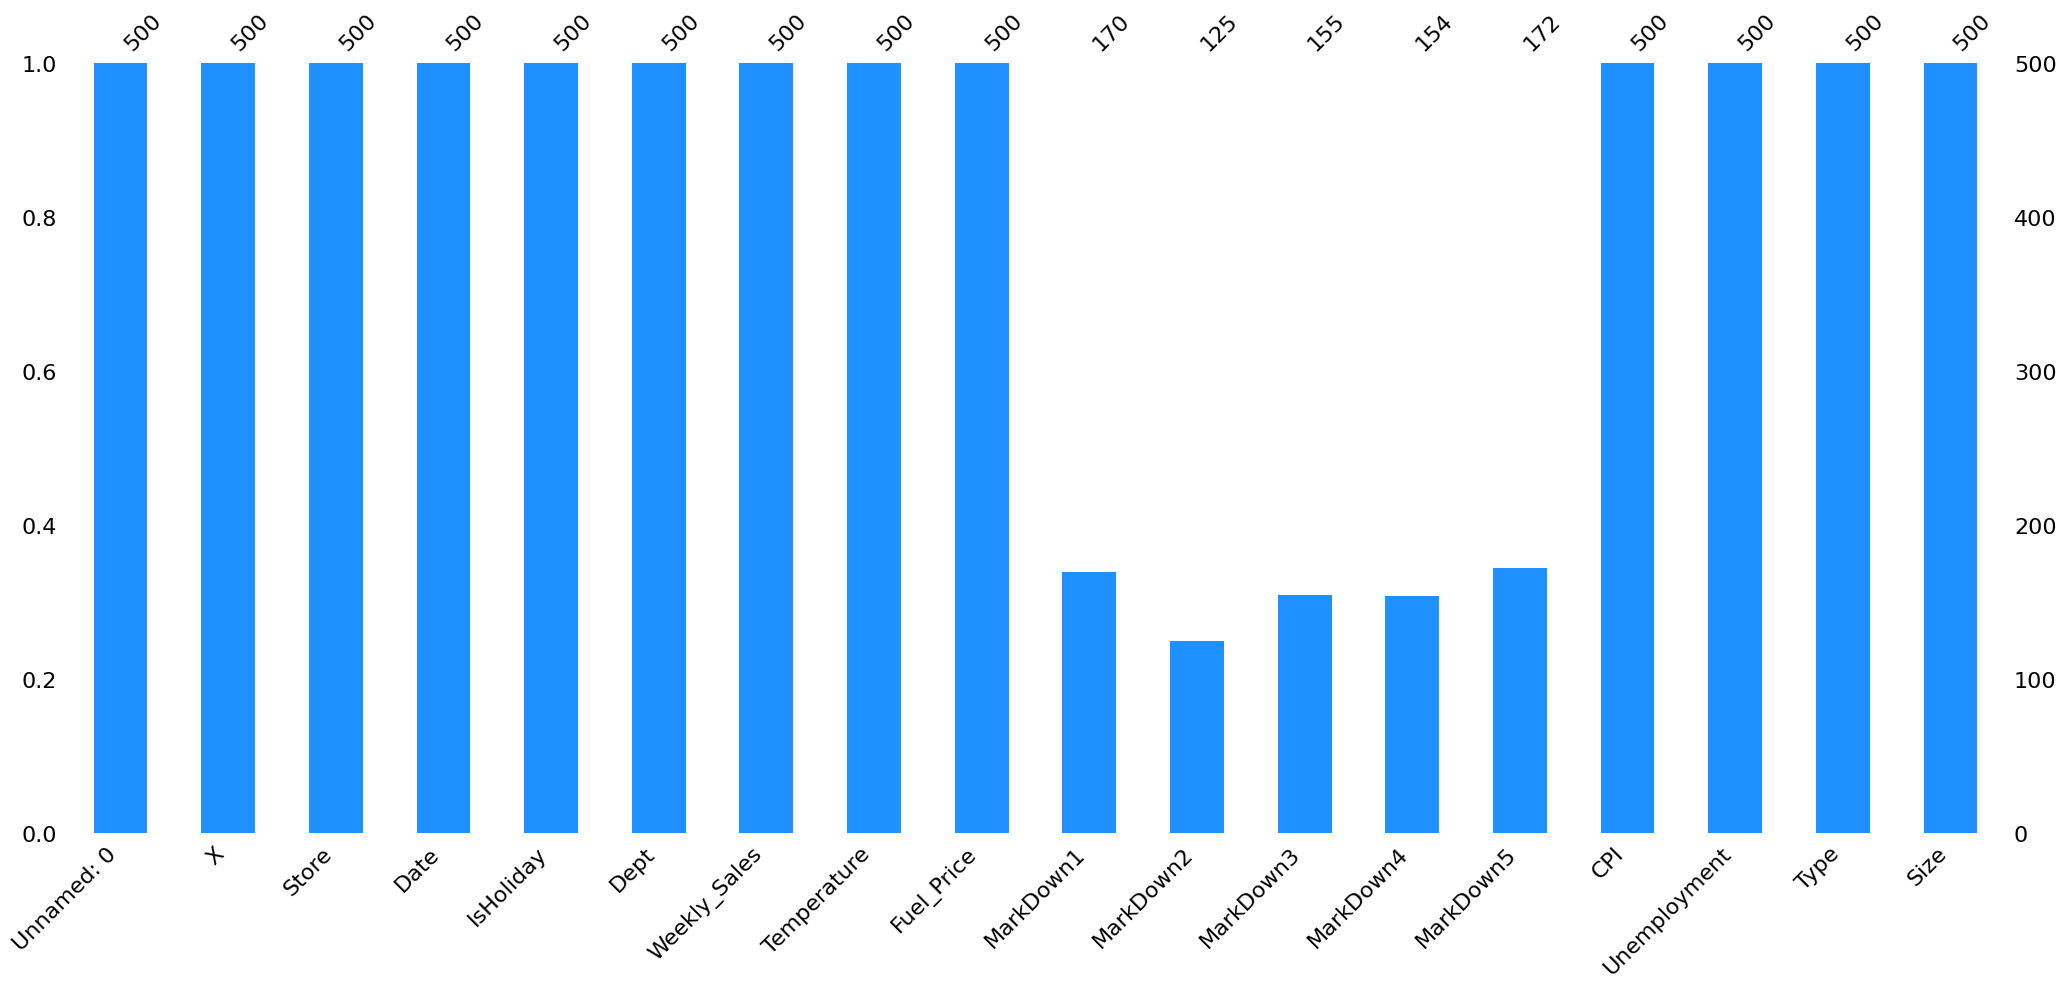

In [87]:
#Checking null values
msno.bar(data, color="dodgerblue")

#Are there missing values?

Yes the missing values are in MarkDown1-5
and the missing value is marked with an NA.

In [88]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Dropping table- 

Date, CPI, Fuel_Price, Unemployment, Temperature

In [89]:
data[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = data[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
data['Year'] = pd.to_datetime(data['Date']).dt.year
data['Month'] = pd.to_datetime(data['Date']).dt.month
data['Week'] = pd.to_datetime(data['Date']).dt.isocalendar().week
data = data.drop(columns=["Date", "CPI", "Fuel_Price", 'Unemployment', 'Temperature'])

In [90]:
df = data.pop('Weekly_Sales')
data['Weekly_Sales'] = df
data

,Unnamed: 0,X,Store,IsHoliday,Dept,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Type,Size,Year,Month,Week,Weekly_Sales
0,202017,202017,21,False,36,0.00,0.00,0.00,0.00,0.00,B,140167,2011,2,8,1025.00
1,165520,165520,17,False,31,14469.08,1163.89,37.38,8771.30,2237.79,B,93188,2012,3,9,1236.64
2,389207,389207,41,False,94,4594.56,305.47,1781.24,3168.10,21739.26,A,196321,2011,12,48,37971.00
3,133193,133193,14,False,67,0.00,0.00,0.00,0.00,0.00,A,200898,2011,5,18,26400.02
4,401356,401356,43,False,1,0.00,0.00,0.00,0.00,0.00,C,41062,2010,10,40,8748.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,172845,172845,18,False,36,0.00,0.00,0.00,0.00,0.00,B,120653,2011,6,23,5338.50
496,154839,154839,16,False,4,516.47,61.00,944.52,9.00,7124.75,B,57197,2011,12,48,13876.12
497,197058,197058,20,False,48,6569.40,605.70,0.00,561.31,4567.03,A,203742,2012,6,26,1034.00
498,149126,149126,16,False,18,0.00,0.00,0.00,0.00,0.00,B,57197,2010,4,13,3943.81


# All NA values removed

In [91]:
data.isnull().sum()

Unnamed: 0      0
X               0
Store           0
IsHoliday       0
Dept            0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
Type            0
Size            0
Year            0
Month           0
Week            0
Weekly_Sales    0
dtype: int64

<Figure size 800x500 with 0 Axes>

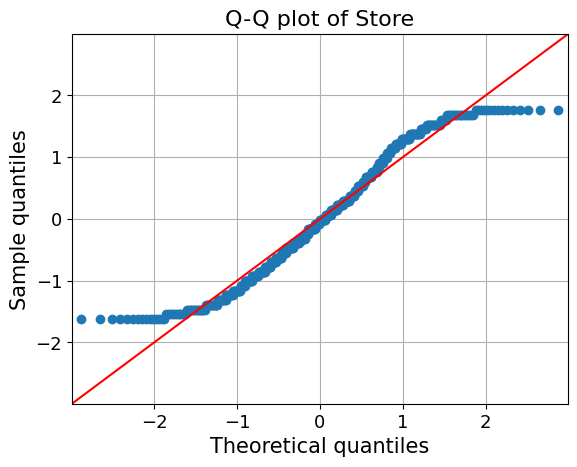

<Figure size 800x500 with 0 Axes>

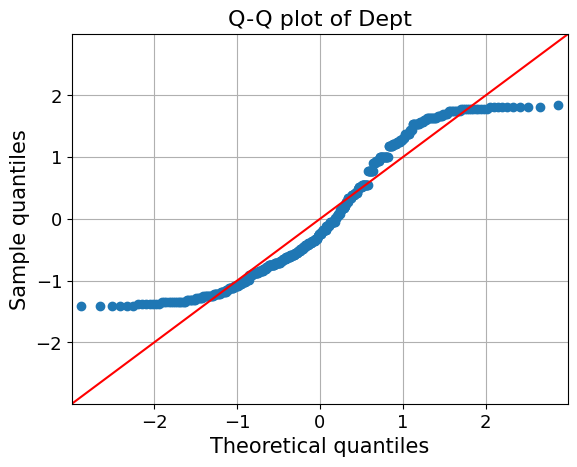

<Figure size 800x500 with 0 Axes>

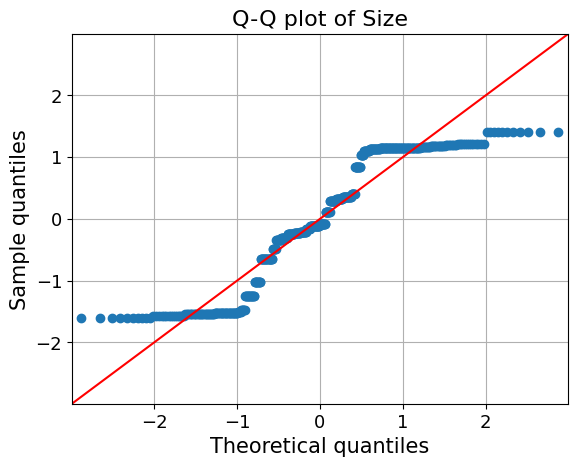

<Figure size 800x500 with 0 Axes>

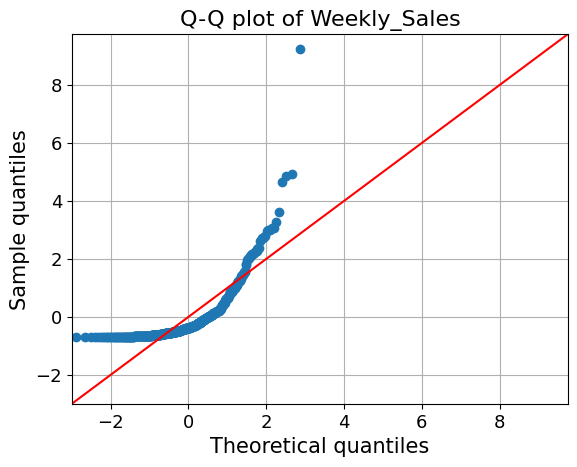

<Figure size 800x500 with 0 Axes>

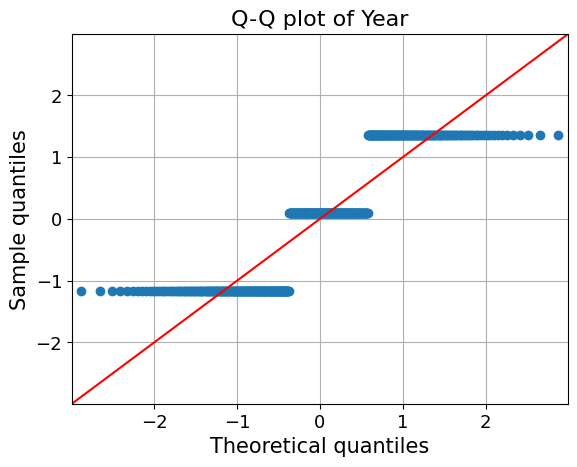

<Figure size 800x500 with 0 Axes>

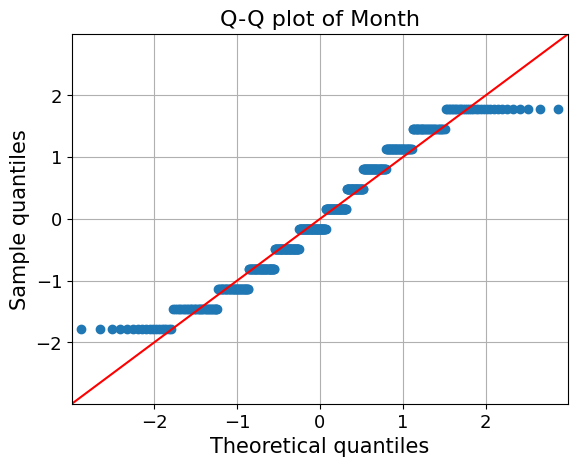

In [92]:
#What are the likely distributions of the numeric variables?

#checking the distribution of independent variables   #Duration error
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['Store', 'Dept', 'Size', 'Weekly_Sales', 'Year', 'Month']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

#What are the likely distributions of the numeric variables?
Looking at the Q-Q plot above, it appears that all independent variables are roughly following normal, exponential,skewed distribution


In this plot, the x-axis shows the theoretical quantiles of a normal distribution, while the y-axis shows the sample quantiles for the "Weekly_Sales" variable in the "data" DataFrame. The scatter of points shows the relationship between the theoretical quantiles and the actual quantiles for the "Weekly_Sales" variable.

<Axes: >

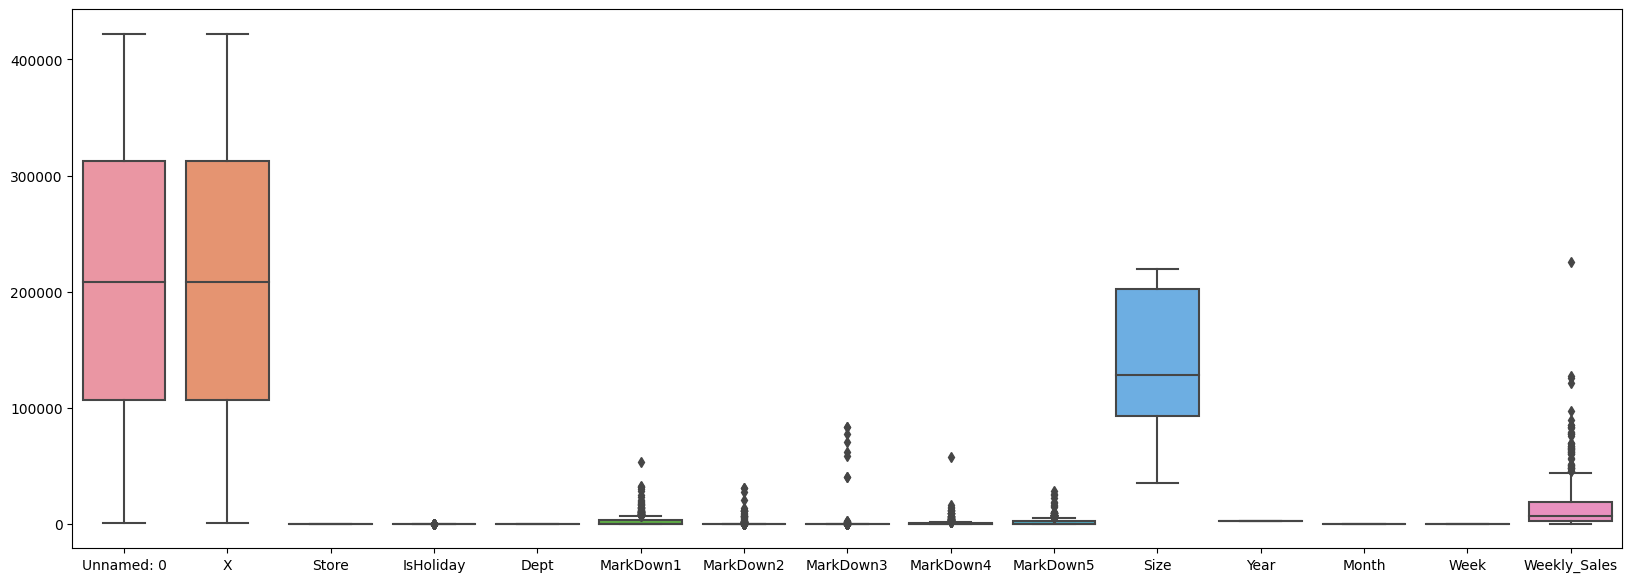

In [93]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data=data)

#The Ranges of the predictor variables and dependent variable
A box plot is a way of representing the distribution of a dataset by showing the median, quartiles, and outliers. The box in the plot represents the interquartile range (IQR), which is the range of values that lie between the first and third quartiles. The line inside the box represents the median. The whiskers extending from the box show the range of non-outlier values, while the points outside the whiskers indicate outliers.

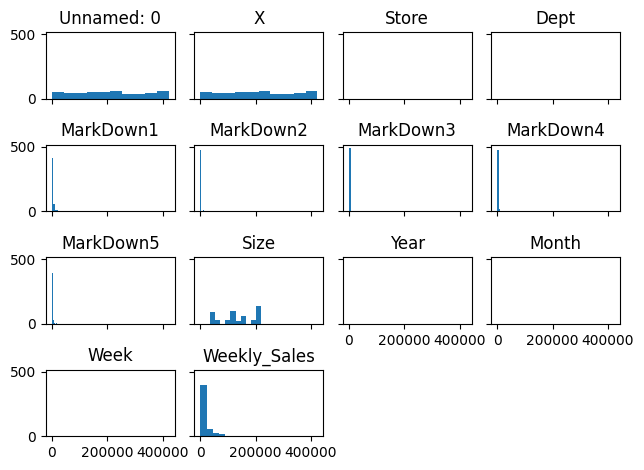

In [94]:
_ = data.hist(sharex=True, sharey=True, grid=False)
plt.tight_layout()

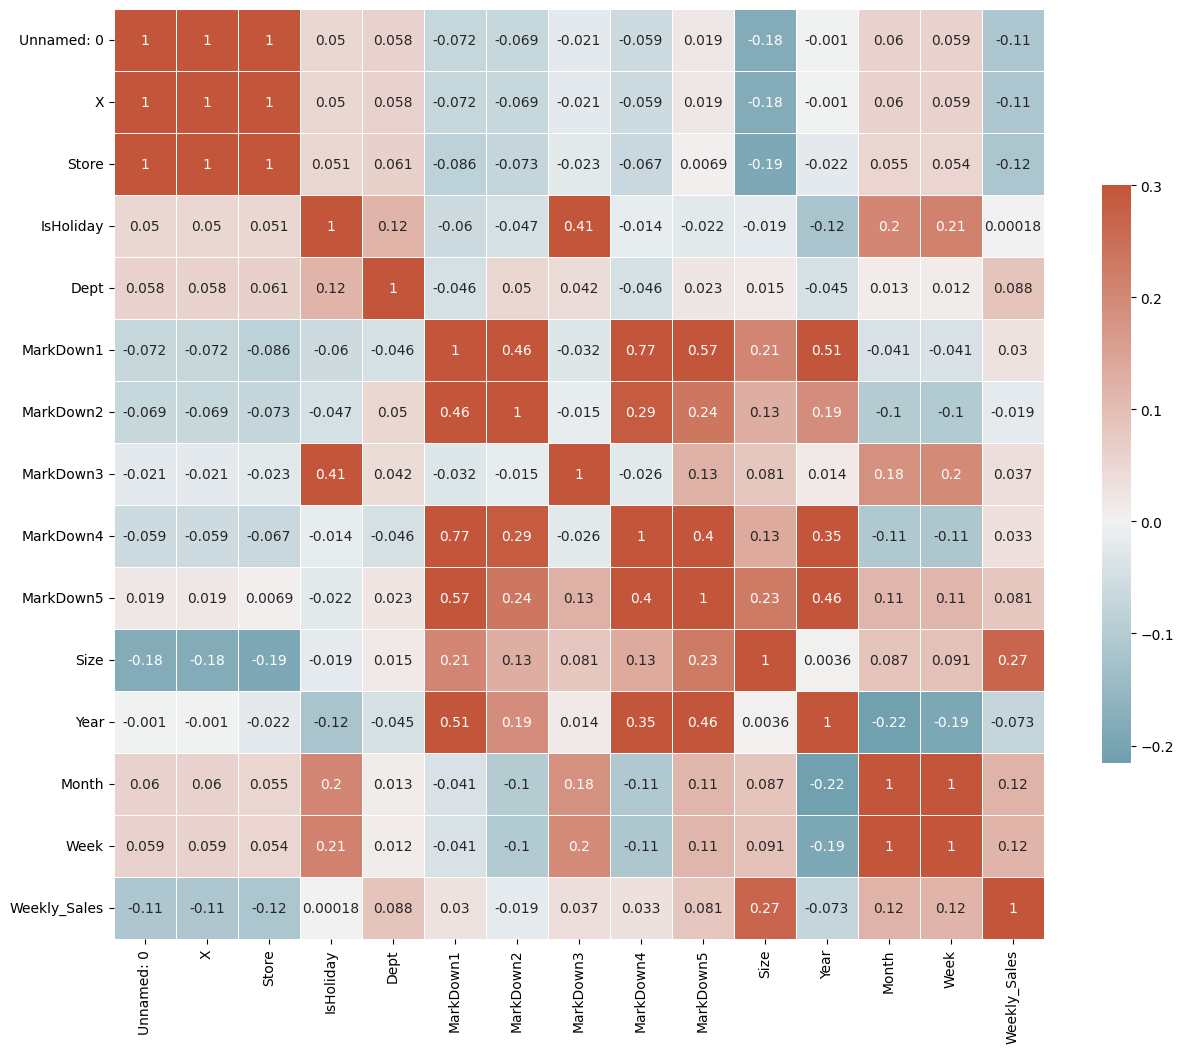

In [95]:
#Input Variables Correlation with the output feature Weekly_Sales
corr = data.corr()
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()

 # By watching the correlation matrix, we can see that Weekly_Sales have a higher correlation with Store, Dept and Size.

In [96]:
#Creating binary vaiables for weekly_sales 

data = pd.get_dummies(data)

# Normalizing the data in the rings column beacuse the value is too high when compared to other independent variable

from sklearn import preprocessing

# Create x to store scaled values as floats
x = data[['Weekly_Sales']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data[['Weekly_Sales']] = pd.DataFrame(x_scaled)

Identifing predictor significance

In [97]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['Weekly_Sales'], data[['Store', 'Dept','Size', 'Year', 'Month']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Weekly_Sales   R-squared (uncentered):                   0.382
Model:                            OLS   Adj. R-squared (uncentered):              0.376
Method:                 Least Squares   F-statistic:                              61.20
Date:                Wed, 05 Apr 2023   Prob (F-statistic):                    1.31e-49
Time:                        03:31:23   Log-Likelihood:                          463.55
No. Observations:                 500   AIC:                                     -917.1
Df Residuals:                     495   BIC:                                     -896.0
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Store         -0.0006      0.000     -1.831      0.068      -0.001    4.54e-05
Dept           0.0003      0.000      2.040      0.042    1.08e-05       0.001
Size        3.984e-07   7.22e-08      5.520      0.000    2.57e-07     5.4e-07
Year       -2.632e-06   8.33e-06     -0.316      0.752    -1.9e-05    1.37e-05
Month          0.0034      0.001      2.389      0.017       0.001       0.006
==============================================================================
Omnibus:                      396.554   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8676.288
Skew:                           3.295   Prob(JB):                         0.00
Kurtosis:                      22.314   Cond. No.                     4.78e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#So Dept, Size and Month has P value less than 0.05

#Building the Model --
Train ,Validation and Test split

In [98]:
from sklearn.model_selection import  train_test_split

X = data[ ['Store', 'Dept','Size', 'Year', 'Month', 'Weekly_Sales']]

y = data['Weekly_Sales']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

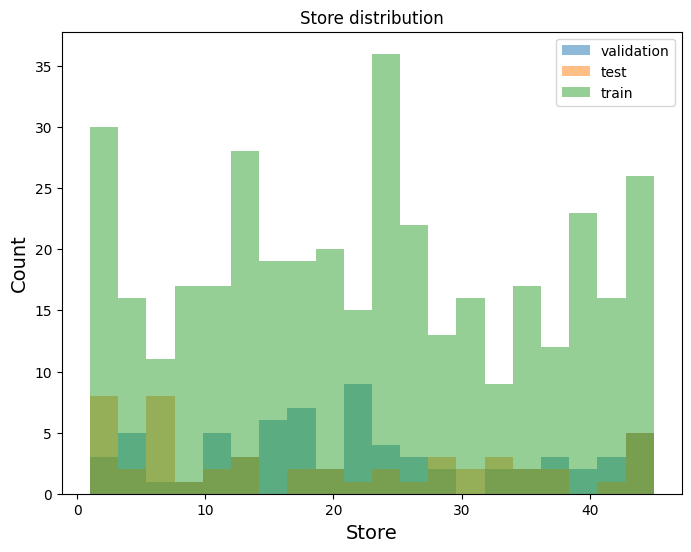

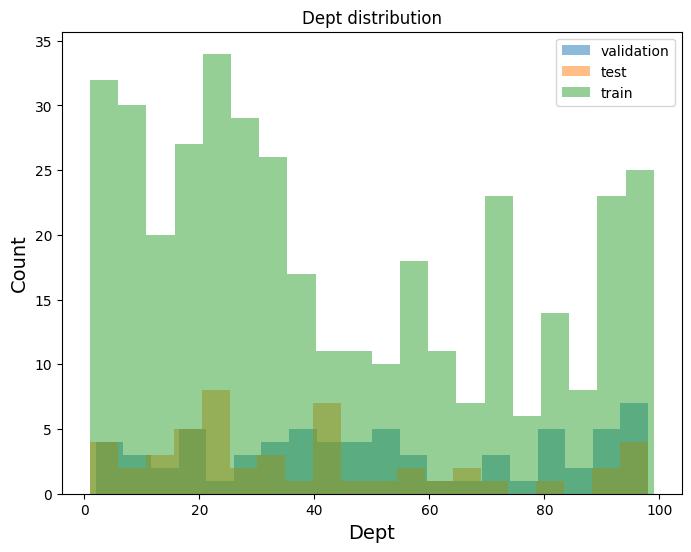

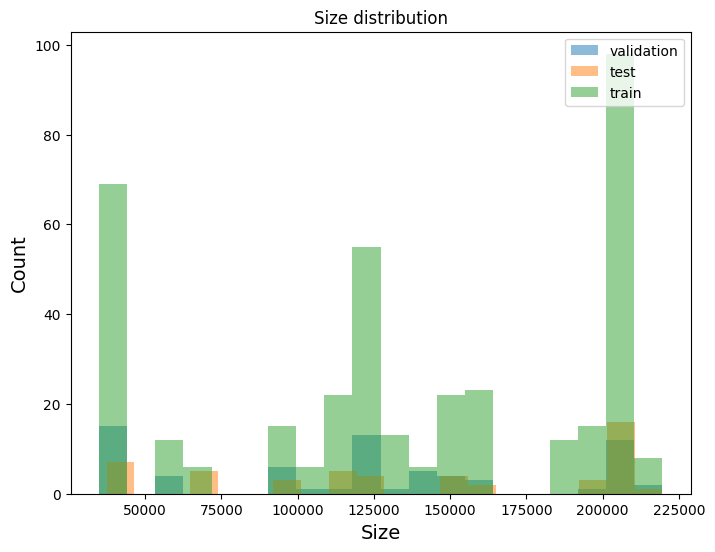

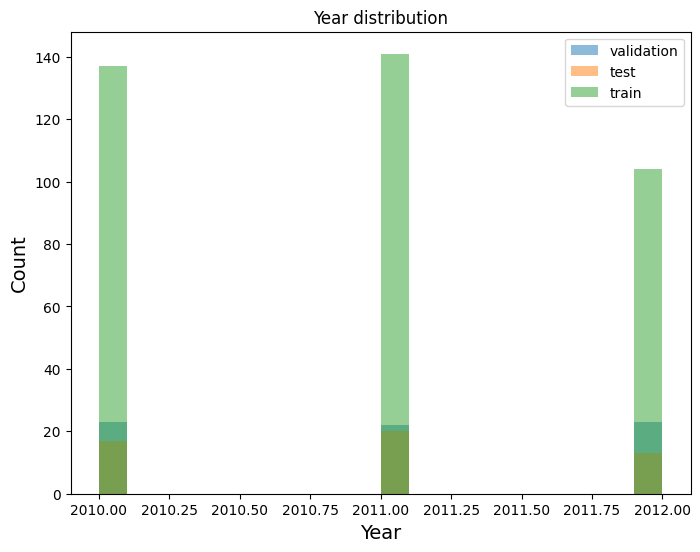

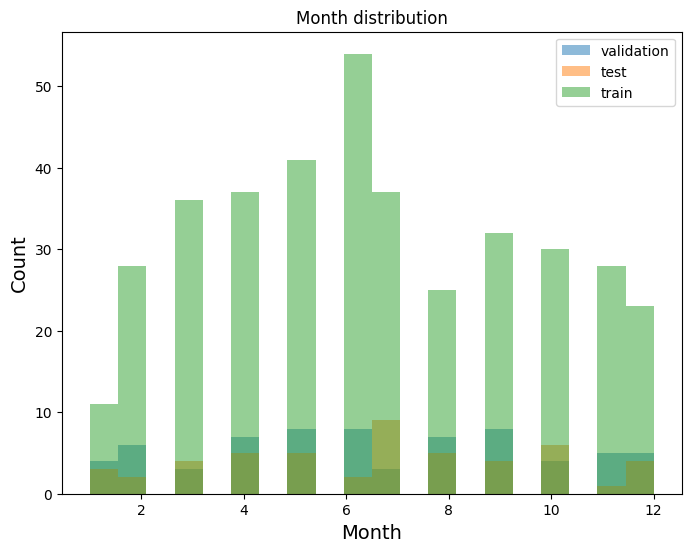

In [99]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['Store', 'Dept','Size', 'Year', 'Month']]

X_val_plot = X_val[['Store', 'Dept','Size', 'Year', 'Month']]

X_train_plot = X_train[['Store', 'Dept','Size', 'Year', 'Month']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

#The division of dataset in Test, train and validation sets looks fine except few boundary values of table, 'Store', 'Dept', 'Size', 'Year', 'Month' which appears to be missing in test and validation sets


Linear Regression

In [100]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [101]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

LinearRegression()

Making predictions

In [102]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

Mean squared error: 0.00
Coefficient of determination: 1.00
R^2 score on tarining set = 1.0


In [103]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)

Mean squared error: 0.00
Coefficient of determination: 1.00
R^2 score on validation set = 1.0


In [104]:
#installing dependencies
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Understanding the important features

In [105]:
#Understanding the important features 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
1.8257 ± 0.5650,Weekly_Sales
0 ± 0.0000,Month
0 ± 0.0000,Year
0 ± 0.0000,Size
0 ± 0.0000,Dept
0 ± 0.0000,Store


* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [106]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [107]:
data['Weekly_Sales'].describe()

count    500.000000
mean       0.068679
std        0.100688
min        0.000000
25%        0.009119
50%        0.031044
75%        0.083317
max        1.000000
Name: Weekly_Sales, dtype: float64

In [108]:
df_number = data[['Weekly_Sales']]
df_number['number_copy_1_percent'] = df_number[['Weekly_Sales']]
df_number['number_copy_5_percent'] = df_number[['Weekly_Sales']]
df_number['number_copy_10_percent'] = df_number[['Weekly_Sales']]
df_number['sample_num'] = data[['Store']]
df_number['sample_num'] = df_number['sample_num']/1000
df_number

,Weekly_Sales,number_copy_1_percent,number_copy_5_percent,number_copy_10_percent,sample_num
0,0.004548,0.004548,0.004548,0.004548,0.021
1,0.005488,0.005488,0.005488,0.005488,0.017
2,0.168639,0.168639,0.168639,0.168639,0.041
3,0.117248,0.117248,0.117248,0.117248,0.014
4,0.038851,0.038851,0.038851,0.038851,0.043
...,...,...,...,...,...
495,0.023706,0.023706,0.023706,0.023706,0.018
496,0.061625,0.061625,0.061625,0.061625,0.016
497,0.004588,0.004588,0.004588,0.004588,0.020
498,0.017512,0.017512,0.017512,0.017512,0.016


In [109]:
def get_percent_missing(dataframe):
    
    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

In [110]:
print(get_percent_missing(df_number))

                                   column_name  percent_missing
Weekly_Sales                      Weekly_Sales              0.0
number_copy_1_percent    number_copy_1_percent              0.0
number_copy_5_percent    number_copy_5_percent              0.0
number_copy_10_percent  number_copy_10_percent              0.0
sample_num                          sample_num              0.0


In [111]:
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

In [112]:
create_missing(df_number, 0.01, 'number_copy_1_percent')
create_missing(df_number, 0.05, 'number_copy_5_percent')
create_missing(df_number, 0.1, 'number_copy_10_percent')

In [113]:
print(get_percent_missing(df_number))

                                   column_name  percent_missing
Weekly_Sales                      Weekly_Sales              0.0
number_copy_1_percent    number_copy_1_percent              1.0
number_copy_5_percent    number_copy_5_percent              5.0
number_copy_10_percent  number_copy_10_percent             10.0
sample_num                          sample_num              0.0


In [114]:
# Store Index of NaN values in each coloumns
number_1_idx = list(np.where(df_number['number_copy_1_percent'].isna())[0])
number_5_idx = list(np.where(df_number['number_copy_5_percent'].isna())[0])
number_10_idx = list(np.where(df_number['number_copy_10_percent'].isna())[0])

In [115]:
print(f"Length of number_1_idx is {len(number_1_idx)} and it contains {(len(number_1_idx)/len(df_number['number_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_number['number_copy_1_percent'])}")
print(f"Length of number_5_idx is {len(number_5_idx)} and it contains {(len(number_5_idx)/len(df_number['number_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_number['number_copy_1_percent'])}")
print(f"Length of number_10_idx is {len(number_10_idx)} and it contains {(len(number_10_idx)/len(df_number['number_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_number['number_copy_1_percent'])}")

Length of number_1_idx is 5 and it contains 1.0% of total data in column | Total rows: 500
Length of number_5_idx is 25 and it contains 5.0% of total data in column | Total rows: 500
Length of number_10_idx is 50 and it contains 10.0% of total data in column | Total rows: 500


In [116]:
#Creating a seperate dataframe for performing the KNN imputation
df_number1 = df_number[['sample_num','number_copy_10_percent']]
imputer = KNNImputer(n_neighbors=5)
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_number1), columns = df_number1.columns)


In [117]:
imputed_number_df.sample(10)

,sample_num,number_copy_10_percent
292,0.003,0.006896
40,0.010,0.002380
26,0.025,0.023654
329,0.032,0.025606
331,0.004,0.049958
442,0.032,0.122443
197,0.011,0.009060
226,0.004,0.049958
316,0.027,0.049332
149,0.022,0.159470


In [118]:
print(get_percent_missing(imputed_number_df))

                                   column_name  percent_missing
sample_num                          sample_num              0.0
number_copy_10_percent  number_copy_10_percent              0.0


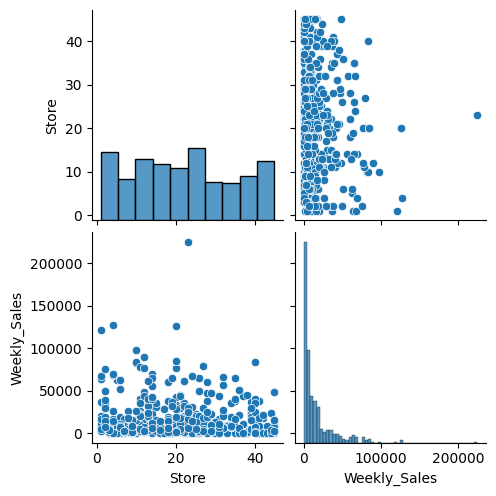

In [119]:
df.pred = numeric_data.filter(['Store','Weekly_Sales'], axis=1).copy()
sns.pairplot(df.pred)

#The resulting pairplot will show a scatterplot of the "Weekly_Sales" variable plotted against the "Store" variable, as well as a histogram of each variable on the diagonal. This can help visualize any patterns or correlations between the two variables, as well as any outliers or other interesting features of the data.

In [120]:
def check_same_distribution(X_train, X_test):
    # Convert data to pandas DataFrames if necessary
    X_train = pd.DataFrame(X_train) if not isinstance(X_train, pd.DataFrame) else X_train
    X_test = pd.DataFrame(X_test) if not isinstance(X_test, pd.DataFrame) else X_test

    # Check if the number of columns in the training and test data is the same
    if X_train.shape[1] != X_test.shape[1]:
        return False

    # Check if the columns in the training and test data are the same
    for col in X_train.columns:
        if col not in X_test.columns:
            return False

    # Calculate the mean and standard deviation of each column in the training data
    train_mean = X_train.mean()
    train_std = X_train.std()

    # Calculate the mean and standard deviation of each column in the test data
    test_mean = X_test.mean()
    test_std = X_test.std()

    # Check if the mean and standard deviation of each column in the training and test data are the same
    for col in X_train.columns:
        if not np.isclose(train_mean[col], test_mean[col], rtol=1e-5) or not np.isclose(train_std[col], test_std[col], rtol=1e-5):
            return False

    return True

In [121]:
result = check_same_distribution(X_train, X_test)

if result:
    print("The training and test data have the same distribution.")
else:
    print("The training and test data do not have the same distribution.")

The training and test data do not have the same distribution.


Answer the following questions


Q: Which independent variables are useful to predict a target (dependent variable)?

A: Below is the rank of the dependent variables
'Store', 'Dept','Size', 'Year', 'Month'


Q: Which independent variables have missing data? How much?

A: No independent variables have any missing data or zeros.


Q: Do the training and test sets have the same data?

A: Yes, most of the data are same in test, train and validation data set except the data points in training set are more and few boundary values are not included in train and validation data set.

Q: In the predictor variables independent of all the other predictor variables?

A: No, they are not independet of each other. There is multi - collinearity among lot of the independent variable which is shown by the correlation table and pairplot map

Q: Which predictor variables are the most important?

A: Weekly_Sales


Q: Do the ranges of the predictor variables make sense?

A: NO


Q: What are the distributions of the predictor variables?

A:
Looking at the Q-Q plots, it appears that all independednt variables are roughly following normal distribution

#Refernces


1. Sckit learn offcial documentation
2. Refered Towards Data Science
3. Eli5 official documentation

The algorithms were referred directly from the Sckit learn official documentation. Visualization was referred from the Machine Learning with scikit-learn Quick Start Guide and Towards Data Science (How do you check the quality of your regression model in Python?). The remaining code was written independently. Feature importance reference is taken from eli5 offical documnetation



**LICENSE**

MIT License

Copyright (c) 2023 Nishank Dave

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
